In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
df.Category.unique()

array(['ham', 'spam'], dtype=object)

In [5]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [6]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df['Category']=pd.get_dummies(df.Category,drop_first=True)

In [8]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(df.Message,df.Category,test_size=.2)

In [10]:
X_train

5183                  Fuuuuck I need to stop sleepin, sup
4504                              Stupid.its not possible
5160                       Ok... Then r we meeting later?
3733                         Gud mrng dear hav a nice day
4918    This is the 2nd time we have tried 2 contact u...
                              ...                        
941     No we sell it all so we'll have tons if coins....
5394            I dont know exactly could you ask chechi.
386                                It took Mr owl 3 licks
3883    Short But Cute: "Be a good person, but dont tr...
3840    Erm … ill pick you up at about 6.45pm. That'll...
Name: Message, Length: 4457, dtype: object

In [11]:
X_train.values #gives you an array of values w/o index

array(['Fuuuuck I need to stop sleepin, sup', 'Stupid.its not possible',
       'Ok... Then r we meeting later?', ..., 'It took Mr owl 3 licks',
       'Short But Cute: "Be a good person, but dont try to prove it.." .Gud noon....',
       "Erm … ill pick you up at about 6.45pm. That'll give enough time to get there, park and that."],
      dtype=object)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer 
v=CountVectorizer()
X_train_count = v.fit_transform(X_train.values)

In [13]:
#X_train_count.toarray()[:3] 

In [14]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [15]:
X_test_count=v.transform(X_test.values)
model.score(X_test_count,y_test)

0.9820627802690582

In [16]:
#X_test_count

In [17]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer','CountVectorizer()'),
    ('nb','MultinomialNB()')    
]
)

In [19]:
#clf.fit(X_train,y_train)- error check again

#### Excercise

In [20]:
from sklearn.datasets import load_wine

In [21]:
df_wine=load_wine()

In [23]:
dir(df_wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [31]:
df=pd.DataFrame(df_wine.data,columns=df_wine.feature_names)

In [32]:
df['target']=df_wine.target

In [36]:
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [35]:
df_wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [38]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [39]:
df0=df[df['target']==0]
df1=df[df['target']==1]
df2=df[df['target']==2]

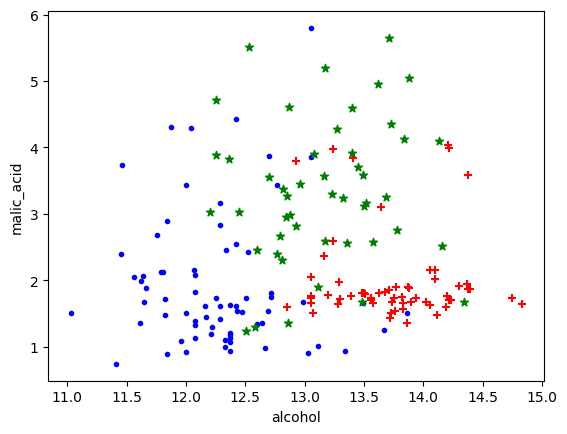

In [42]:
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.scatter(df0['alcohol'],df0['malic_acid'],color='red',marker='+')
plt.scatter(df1['alcohol'],df1['malic_acid'],color='blue',marker='.')
plt.scatter(df2['alcohol'],df2['malic_acid'],color='green',marker='*')


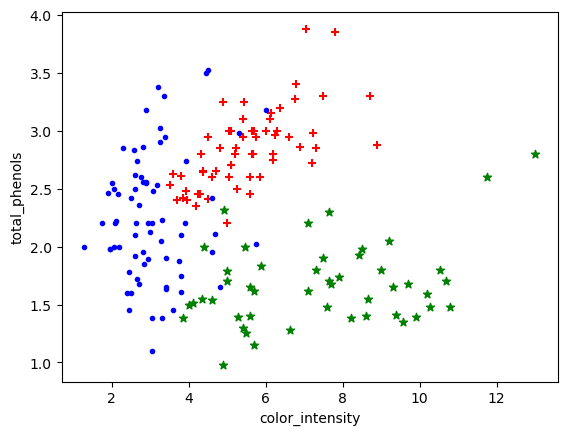

In [43]:
plt.xlabel('color_intensity')
plt.ylabel('total_phenols')
plt.scatter(df0['color_intensity'],df0['total_phenols'],color='red',marker='+')
plt.scatter(df1['color_intensity'],df1['total_phenols'],color='blue',marker='.')
plt.scatter(df2['color_intensity'],df2['total_phenols'],color='green',marker='*')


In [44]:
X=df.drop('target',axis=1)
y=df.target

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.3)

In [79]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [80]:
model.score(X_test,y_test)

0.8518518518518519

In [81]:
from sklearn.naive_bayes import GaussianNB
model_G=GaussianNB()
model_G.fit(X_train,y_train)

GaussianNB()

In [82]:
model.score(X_test,y_test)

0.8518518518518519